### tSNE on Next Day Wildfire Spread data
- each excel file is a 64x64km "image" that represents a separate fire (i think)
- going to run tSNE on each individual file then can do it for combined files

### tSNE
t-distributed Stoichiastic Neighbor embedding does nonlinear dimensionality reduction. tSNE finds a way to project highD data into a low D dimensionality space in a way that preserves clustering in the high dimensionality space. 

1st, distances from each point to its neighbors in the high D space. It then translates these to probabilities, where closer points have higher probabilities of being picked as neighbors. Next it creates a similar distance map in 2- or 3-D space, initially placing the points randomly. It measures the distances on this new map and converts them to probabilities. It iteratively moves the points on the low-D map until the probabilities of the low-D match the probabilities of the high-D as much as possible. 

<Axes: title={'center': 'TRAIN ALL'}, xlabel='TSNE_col1', ylabel='TSNE_col2'>

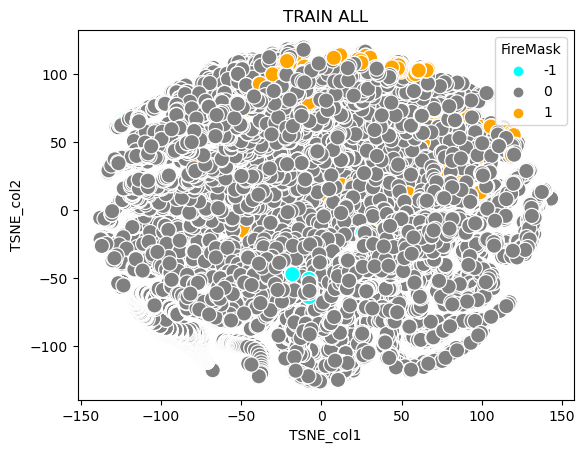

In [63]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

df = pd.read_excel("train_COMBINED_20250121.xlsx")

# for tSNE, X is the features and Y is the labels (here just firemask)
X = df.iloc[:, 1:]
Y = df.iloc[:,0]

n_dims = 2      # dimensions of the embedded space
tsne = TSNE(n_dims)
result = tsne.fit_transform(X)
#print(result.shape)

result_df = pd.DataFrame({'TSNE_col1': result[:,0], 'TSNE_col2': result[:,1], 'FireMask' : Y})
fig, ax = plt.subplots(1)
plt.title("TRAIN ALL")
color_map = {-1:'cyan', 0:'gray', 1:'orange'}
sns.scatterplot(x='TSNE_col1', y='TSNE_col2', hue='FireMask', data=result_df, ax=ax, s=120, palette=color_map )